# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [4]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [5]:
# YOUR CODE HERE

adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
adults = pd.read_csv(adultDataSet_filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [6]:
# YOUR CODE HERE
adults.info()
adults.head()
adults.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [7]:
# YOUR CODE HERE
# I try to find the total count of salary more than $50,000 and less than $50,000
adults.income_binary.value_counts()


<=50K    24720
>50K      7841
Name: income_binary, dtype: int64

/home/codio/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income_binary', ylabel='count'>

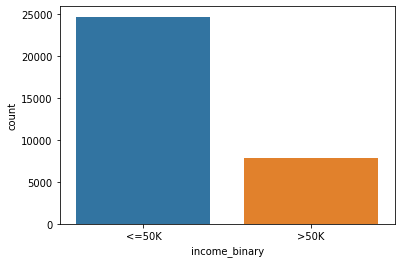

In [8]:
# use plot to make it more visible
sns.countplot(adults.income_binary)


In [9]:
#since <=50,000 is much more than >50k, then I try to make their count even
#random select 7841 amples from <= 50,000 and then select all 7841 samples of >50,000

#negative stands for the sample of <=50k and positive stands for the sample over 50k
negative = adults.loc[adults.income_binary == '<=50K'].iloc[:7841].copy()
positive = adults.loc[adults.income_binary == '>50K'].copy()

In [10]:
negative.shape

(7841, 15)

In [11]:
positive.shape


(7841, 15)

In [12]:
my_adults = pd.concat((negative, positive))
my_adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,71.0,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Non-Female,0,0,10.0,United-States,>50K
15678,39.0,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20.0,United-States,>50K
15679,53.0,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,40.0,United-States,>50K
15680,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Non-Female,0,0,40.0,United-States,>50K


In [51]:
#I'm going to take 'age','education','occupation','hours-per-week','race'as a factor when consider 
samples = my_adults[['age','education','occupation','hours-per-week','race','native-country']].copy()
salary = my_adults.income_binary.copy()

In [52]:
samples

,age,education,occupation,hours-per-week,race,native-country
0,39.0,Bachelors,Adm-clerical,40.0,White,United-States
1,50.0,Bachelors,Exec-managerial,13.0,White,United-States
2,38.0,HS-grad,Handlers-cleaners,40.0,White,United-States
3,53.0,11th,Handlers-cleaners,40.0,Black,United-States
4,28.0,Bachelors,Prof-specialty,40.0,Black,Cuba
...,...,...,...,...,...,...
15677,71.0,Doctorate,NaN,10.0,White,United-States
15678,39.0,Assoc-acdm,Adm-clerical,20.0,White,United-States
15679,53.0,Masters,Exec-managerial,40.0,White,United-States
15680,40.0,HS-grad,Machine-op-inspct,40.0,White,United-States


In [53]:
salary

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
15677     >50K
15678     >50K
15679     >50K
15680     >50K
15681     >50K
Name: income_binary, Length: 15682, dtype: object

In [54]:
#making the eduction into numerical value



unique_array = samples.education.unique()

def map_func(x):
    return np.argwhere(x==unique_array)[0,0]


samples.education = samples.education.map(map_func)
samples.education

0         0
1         0
2         1
3         2
4         0
         ..
15677    14
15678     5
15679     3
15680     1
15681     1
Name: education, Length: 15682, dtype: int64

In [55]:
samples.head()

,age,education,occupation,hours-per-week,race,native-country
0,39.0,0,Adm-clerical,40.0,White,United-States
1,50.0,0,Exec-managerial,13.0,White,United-States
2,38.0,1,Handlers-cleaners,40.0,White,United-States
3,53.0,2,Handlers-cleaners,40.0,Black,United-States
4,28.0,0,Prof-specialty,40.0,Black,Cuba


In [62]:
def map_func(x, unique_values):
    idx = np.where(unique_values == x)
    if idx[0].size:
        return idx[0][0]
    else:
        return np.nan  # Return NaN if the value is not in unique_values

# Convert 'occupation' column to numerical values
unique_occupation = samples['occupation'].unique()
samples['occupation'] = samples['occupation'].apply(map_func, unique_values=unique_occupation)

mean_occupation = round(samples['occupation'].mean())
samples['occupation'].fillna(mean_occupation, inplace=True)

# Convert 'native-country' column to numerical values
unique_country = samples['native-country'].unique()
samples['native-country'] = samples['native-country'].apply(map_func, unique_values=unique_country)

mean_country = round(samples['native-country'].mean())
samples['native-country'].fillna(mean_country, inplace=True)


In [63]:
#making the eduction into numerical value

unique_array = samples.race.unique()

def map_func(x):
    return np.argwhere(x==unique_array)[0,0]


samples.race = samples.race.map(map_func)
samples.race




0        0
1        0
2        0
3        1
4        1
        ..
15677    0
15678    0
15679    0
15680    0
15681    0
Name: race, Length: 15682, dtype: int64

In [64]:
train = samples.copy()
target = salary.map({'<=50K':0, '>50K':1})

train.fillna(train.mean(), inplace=True)
target.fillna(target.mean(), inplace=True)

In [65]:
KNN_model = KNeighborsClassifier()

In [66]:
def prediction(train, target, model, count):
    train_score = []
    test_score = []
    for i in range(count):
        X_train, X_test, y_train, y_test = train_test_split(train,target,test_size=0.3,random_state=i)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train,y_train))
        test_score.append(model.score(X_test,y_test))
    return np.array(train_score), np.array(test_score) 

In [67]:
train_score, test_score = prediction(train, target, KNN_model, 10)

In [68]:
print('train set score overall:',train_score.mean(), 'std:', train_score.std())

train set score overall: 0.7868178919559078 std: 0.0017382839139513952


In [69]:
print('test set score overall:',test_score.mean(), 'std:', test_score.std())

test set score overall: 0.6933049946865038 std: 0.00545362514430425


In [70]:
#now, I want to change couple parameters to make the model more accurate

In [71]:
np.sqrt(train.shape[0]*0.8)

112.0071426293877

In [72]:
K_range = np.arange(3,111,step=10)
K_range

array([  3,  13,  23,  33,  43,  53,  63,  73,  83,  93, 103])

In [73]:
train_score_mean = []
test_score_mean = []

for k in K_range:
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    train_score, test_score = prediction(train, target, KNN_model, 10)
    train_score_mean.append(train_score.mean())
    test_score_mean.append(test_score.mean())

result = pd.DataFrame(data={
    'K':K_range,
    'Train':train_score_mean,
    'Test':test_score_mean
})
    
#this step is going to running awhile

<AxesSubplot:xlabel='K'>

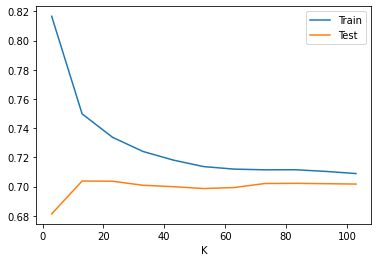

In [74]:
result.set_index('K').plot()